<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

<font size=1>Parte de este material es autoría del profesor Cristian Guarnizo de la Universidad Tecnológica de Pereira. A él damos créditos.</font>

En este notebook se implementan tres casos de algoritmos genéticos:
<ul>
    <li>Problema de la bolsa.</li>
    <li>Problema del viajero.</li>
    <li>Problema de minimización de una función real.</li>
</ul>

<hr>
## Módulo 2_2: Algoritmos Bioinspirados - Algoritmos genéticos
<img src="res/AG/algorithm.png" width="600px">

<hr>
## 1.Problema de la Bolsa
Determinar para cada caso cuales objetos se deben llevar, maximizando la suma de los valores de los elementos sin sobrepasar la capacidad.
<img src="res/AG/bolsa.png" width=400>
En este problema se requiere maximizar el beneficio sin sobrepasar la capacidad. Se emplea el algoritmo genético con codificación binaria (genbin), debido que la codificación binaria me permite con 1 lógico incluir el elemento, y con un 0 excluirlo. Finalmente se encuentra que elementos se deben agregar de tal forma que se maximice el beneficio. 

<hr>
### 1.1. Funcion de aptitud

In [1]:
'''
Program: Genetic Algorithm binary cromosome evaluation function
         for bag problem.
Author: Pedro Atencio
Copyright 2017
'''
import numpy as np

def evalbin(x):
    a=np.array([28, 11, 15, 19, 5, 3, 8]) #element size array
    c=np.array([40, 22, 30, 37, 8, 5, 12]) #element benefit array
    b=44 #load limit (constraint)
    
    #1 - include element, 0 - not include element

    #if array x does not satisfy size constraint
    if (np.sum(a*x) > b):
        val=0
    else: #if it does
        val=np.sum(c*x)
    
    return val

### 1.2. Inicializar parámetros del algoritmo genético

In [22]:
'''
Program: Genetic Algorithm for bag problem.
Author: Pedro Atencio
Copyright 2017
'''

#GA parameters
ni = 100 #number of iterations
nc = 10 #number of individuals
ng = 7 #number of genes == items in problem

pc = 0.9
pm = 0.5

### 1.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

In [15]:
p = np.zeros([nc, ng])

fa = np.zeros([nc], dtype=np.int)
for i in range(nc):
    fa[i] = evalbin(p[i,:])

### 1.4. Ciclo principal del algoritmo genético:
Seleccion->Cruce->Mutación->Evaluación->Inserción

In [20]:
for i in range(ni):
    #selection - simple random selection
    p1 = np.random.randint(nc-1)
    p2 = np.random.randint(nc-1)
    
    #crossing - One Point
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #mutation - Bit Inversion
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #evaluation
    eval_child1 = evalbin(child1)
    eval_child2 = evalbin(child2)
    
    #insertion - Max
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2

### 1.5. Mostrar mejor individuo al final del ciclo

In [21]:
print 'La mejor configuración para la bolsa es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor configuración para la bolsa es:  [ 0.  0.  1.  1.  1.  1.  0.]
Con una función de aptitud de:  80


<hr>
## 2. Problema del viajero
<img src="res/AG/tsp.png" width=600>
Determinar cual es la mejor ruta que minimice el recorrido por las ciudades ubicadas en las siguientes coordenadas: (graficar la solución del recorrido.
<img src="res/AG/cities.png" width=600>
<br>
Para resolver este problema se emplea el algoritmo genético con codificación entera en donde no se repiten los números (no se repiten ciudades). Para evaluar los cromosomas se requiere diseñar la funciona de evaluación.

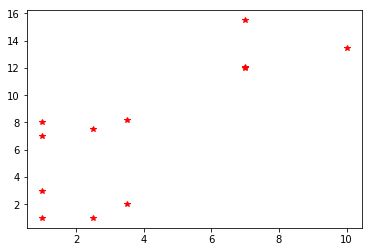

In [2]:
'''
plot problem
'''

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #cities x coordinate
y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #cities y coordinate

plt.plot(x, y, 'r*')#cities

<hr>
### 2.1. Funcion de aptitud

In [3]:
'''
Program: Genetic Algorithm integer cromosome evaluation function
         for travel salesman problem.
Author: Pedro Atencio
Copyright 2017
'''
import numpy as np

def evalent(ind):
    x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #cities x coordinate
    y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #cities y coordinate
    
    #close loop between cities
    ind = np.append(ind,ind[0])
    
    dist_sum = 0 #sum of distances of path
    
    for i in range(len(x)):
        #cities index
        tx1 = x[ind[i]]
        tx2 = x[ind[i+1]]
        ty1 = y[ind[i]]
        ty2 = y[ind[i+1]]
        
        #linear distance between 2 adyacent cities
        dist_sum += np.sqrt( (tx1-tx2)**2 + (ty1-ty2)**2 )
    
    return 1.0/dist_sum

### 2.2. Inicializar parámetros del algoritmo genético

In [4]:
#GA parameters
ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 12 #number of genes == cities

pc = 0.9
pm = 0.5

#plot variable
plot_max_fa = np.zeros([ni])

### 2.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

In [5]:
fa = np.zeros([nc], dtype=np.float)
p = np.zeros([nc, ng], dtype=np.int)
#population initialization and aptitude function calculated
for i in range(nc):
    p[i, :] = np.random.permutation(ng) 
    fa[i] = evalent(p[i])

### 2.4. Ciclo principal del algoritmo genético:
Seleccion->Cruce->Mutación->Evaluación->Inserción

In [6]:
for i in range(ni):
    #selection - best selection (parent1)
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross: permutation one point
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #mutation: order change
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #evaluation
    eval_child1 = evalent(child1)
    eval_child2 = evalent(child2)
    
    #insertion - max
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    
    plot_max_fa[i] = fa[np.argmax(fa)]

### 2.5. Mostrar mejor individuo al final del ciclo

In [7]:
print 'La mejor ruta es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor ruta es:  [ 2  3  4  7 11 10  8  9  6  5  0  1]
Con una función de aptitud de:  0.0261796274509


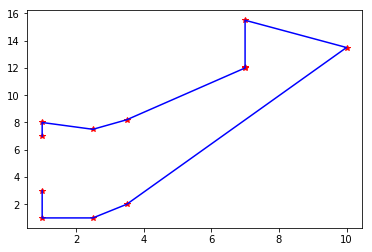

In [8]:
'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show() 

<hr>
## 3. Problema de minimización de una función real

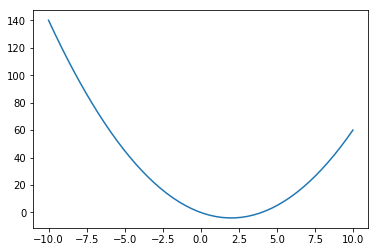

In [51]:
x = np.linspace(-10,10,num=50)
y = (x-2.0)**2.0-4.0
plt.plot(x,y)
plt.show()

Lo primero que se requiere es diseñar la función de evaluación. La función recibe un vector x, donde en cada elemento del vector están las variables x1, x2, x3, mejor dicho x=[ x1,x2,x3]. Para obtener el valor x1 del vector x, se escribe x(1), lo mismo se aplica para las otras variables. 

<hr>
### 3.1. Funcion de aptitud

In [55]:
def evalreal(x):
    return (x-2.0)**2.0-4.0

### 3.2. Inicializar parámetros del algoritmo genético

In [57]:
#GA parameters
ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 1 #number of genes == variable x

pc = 0.9
pm = 0.5
alpha = 0.5 #cross percentage for arithmetic cross

#search range
a = -10
b = 10

### 3.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

In [59]:
#initial population
p = np.random.rand(nc,ng)
p = (b-a)*p + a 

#initial population evaluation using evalreal
fa = evalreal(p)

### 3.4. Ciclo principal del algoritmo genético:
Seleccion->Cruce->Mutación->Evaluación->Inserción

In [61]:
for i in range(ni):
    #selection: simple - random
    p1_index = np.random.randint(nc)
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross
    if(np.random.rand() <= pc):
        child1 = alpha*p1+(1-alpha)*p2
        child2 = alpha*p2+(1-alpha)*p1
    
    #evaluation
    eval_child1 = evalreal(child1)
    eval_child2 = evalreal(child2)
    
    #insertion
    if(eval_child1 < fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 < fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2


### 3.5. Mostrar mejor individuo al final del ciclo

In [62]:
print 'El valor de x que minimiza la función es: ', p[np.argmin(fa)]
print 'Con una función de aptitud de: ', fa[np.argmin(fa)]

El valor de x que minimiza la función es:  [ 1.99999781]
Con una función de aptitud de:  [-4.]


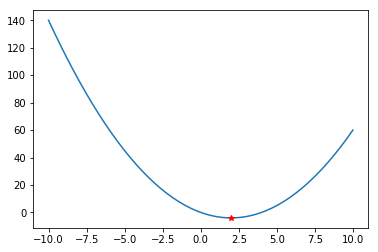

In [66]:
x = np.linspace(-10,10,num=50)
y = evalreal(x)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(p[np.argmin(fa)], fa[np.argmin(fa)], 'r*')
plt.show()